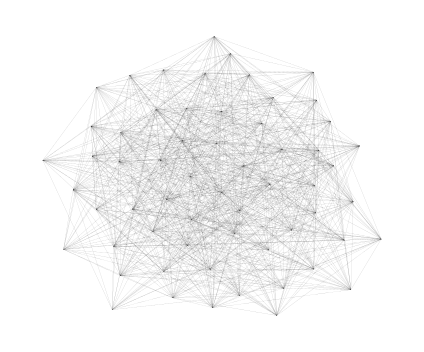

In [1]:
%load_ext autoreload
%autoreload 2
from rbnbr.problems.max_cut import MaxCutProblem
from rbnbr.problems.read_mc import read_mc

%config InlineBackend.figure_format = 'svg'


problem60 = read_mc('./problems/bq/g05_60.0.mc', solution_value=536, keep_prob=1)

problem60.display(save_pgf='./img/g05_60.0.pgf', use_title=False, show_node_labels=False, vis_opts={'node_size': 0, 'edge_alpha': 0.5});


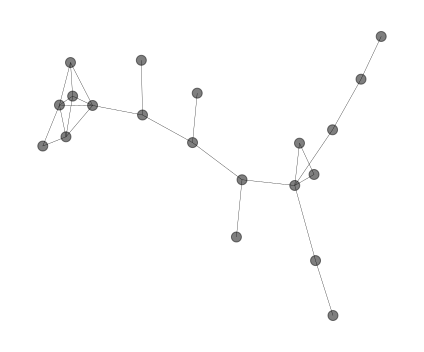

In [2]:
n_v = 20
p = 0.1
problem_rnd = MaxCutProblem.generate_random_maxcut_problem(n_v, r=0.2, weighted=False, solve=True, method='geometric')
problem_rnd.display(use_title=False, show_node_labels=False, 
                    vis_opts={'node_size': 100, 'edge_alpha': 1}, edge_width=0.3, reset_pos=True);
# problem_rnd.display(save_pgf=f'./img/g{n_v}_{p}.pgf', use_title=False, show_node_labels=False, 
#                     vis_opts={'node_size': 100, 'edge_alpha': 1}, edge_width=0.3, reset_pos=True);

In [3]:
import os
import numpy as np
from tqdm.notebook import tqdm
from itertools import product
from rbnbr.problems.max_cut import MaxCutProblem
from rbnbr.problems.problem_base import ProblemSet


problem_set = ProblemSet.load_problems('./problems/small_random2/small_random_problems2.pkl')

# # Create directory if it doesn't exist
# save_dir = './problems/small_random2'
# os.makedirs(save_dir, exist_ok=True)

# # Parameters for problem generation
# sizes = [14, 16, 18, 20]  # Node sizes
# p_values = [0.3, 0.5, 0.6, 0.7]  # Probability for Erdos-Renyi
# r_values = [0.15, 0.3, 0.5, 0.6]  # Radius for geometric graphs
# num_instances = 3  # Number of instances per configuration

# # Create a problem set
# problem_set = ProblemSet()

# # Generate problems
# for n, p in tqdm(list(product(sizes, p_values)), desc="Generating problems"):
#     # Generate Erdos-Renyi graphs
#     for i in range(num_instances):
#         problem_name = f"er_{n}_{p:.1f}_{i}"
#         problem = MaxCutProblem.generate_random_maxcut_problem(
#             n=n, 
#             p=p, 
#             weighted=False, 
#             solve=True,  # Solve exactly to get reference solution
#             method='erdos_renyi',
#             name=problem_name
#         )
#         problem_set.add_problem(problem)
    
# for n, r in tqdm(list(product(sizes, r_values)), desc="Generating problems"):
#     # Generate geometric graphs
#     for i in range(num_instances):
#         problem_name = f"geo_{n}_{r:.1f}_{i}"
#         problem = MaxCutProblem.generate_random_maxcut_problem(
#             n=n, 
#             r=r, 
#             weighted=False, 
#             solve=True,  # Solve exactly to get reference solution
#             method='geometric',
#             name=problem_name
#         )
#         problem_set.add_problem(problem)

# # Save the problem set
# problem_set.save_problems(os.path.join(save_dir, "small_random_problems2.pkl"))

# print(f"Generated {len(problem_set)} problems and saved to {save_dir}/small_random_problems2.pkl")
# print(f"Problem names: {[problem.name for problem in problem_set._problems]}")



# Test Single Problem


In [26]:
import copy
import logging
from rbnbr.solver.quantum.qbnb import QRR_BnB_MC_V3

import pandas as pd

problem_target = problem_set[problem_set._problem_names.index('er_14_0.3_0')]
X_type = 'relaxation'
branching_strategy = 'r1'
search_style = 'bfs'

problem_target = copy.deepcopy(problem_target)


import logging

# Configure the root logger with a handler
logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler()  # This will output to the notebook cell
    ]
)


bnb_solver = QRR_BnB_MC_V3(
    bf_threshold=5,
    branching_strategy=branching_strategy, 
    X_type=X_type,  
    search_style=search_style,
    optimize_correction=True,
)
bnb_solver.logger.setLevel(logging.DEBUG)

bnb_solution = bnb_solver.solve(problem_target)
problem_target.add_solution(f'bnb_corr_r1_bfs_energy', bnb_solution)

2025-05-27 11:21:15,820 - QRR_BnB_MC_V3 - DEBUG - Solving subproblem with size 14
2025-05-27 11:21:15,844 - QRR_BnB_MC_V3 - DEBUG - BETTER CUT: 17.0
2025-05-27 11:21:15,844 - QRR_BnB_MC_V3 - DEBUG - New best cut has path 
  
2025-05-27 11:21:15,845 - QRR_BnB_MC_V3 - DEBUG - Branching on edge 9 13
2025-05-27 11:21:15,846 - QRR_BnB_MC_V3 - DEBUG - Problem reduced to 13 variables
2025-05-27 11:21:15,909 - QRR_BnB_MC_V3 - DEBUG - Bound same: 23.72222222222222
2025-05-27 11:21:15,925 - QRR_BnB_MC_V3 - DEBUG - Bound diff: 21.5
2025-05-27 11:21:15,926 - QRR_BnB_MC_V3 - DEBUG - Solving subproblem with size 13
2025-05-27 11:21:15,926 - QRR_BnB_MC_V3 - DEBUG - BETTER CUT: 20.0
2025-05-27 11:21:15,927 - QRR_BnB_MC_V3 - DEBUG - New best cut has path 
  9 13 0
2025-05-27 11:21:15,928 - QRR_BnB_MC_V3 - DEBUG - Branching on edge 9 2
2025-05-27 11:21:15,928 - QRR_BnB_MC_V3 - DEBUG - Problem reduced to 12 variables
2025-05-27 11:21:15,946 - QRR_BnB_MC_V3 - DEBUG - Bound same: 22.5
2025-05-27 11:21:15,9

In [29]:
bnb_solution.data

{'cost': 21.0,
 'solution': [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0],
 'time': 0.0,
 'approx_ratio': 1.0,
 'n_steps': 402,
 'first_seen': 400,
 'tree_path': [(9, 13, 1),
  (5, 7, 1),
  (6, 10, 1),
  (3, 4, 1),
  (3, 9, 1),
  (12, 3, 1),
  (2, 5, 0),
  (5, 0, 1)],
 'n_pruned': 11887,
 'total_steps': 402}

In [19]:
problem_target.ref_solution_arr

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])

# Test the branch and bound method  (QUANTUM)

In [21]:
from rbnbr.solver.quantum import QRR_BnB_MC, QRR_BnB_MC_V2
from itertools import product
from tqdm.notebook import tqdm

In [30]:
# Define all possible configurations
X_types = ['relaxation', 'corr']
branching_strategies = ['r1', 'r2', 'r3']
# branching_strategies = ['r2']
search_styles = ['bfs', 'dfs']

model_name = 'QRR_BnB_MC_V3'
SOLVER_CLASS = globals()[model_name]


# Run for all combinations of settings
for X_type, branching_strategy, search_style in product(X_types, branching_strategies, search_styles):
    # Construct method name from configuration
    method_name = f"bnb_small_{X_type}_{branching_strategy}_{search_style}_{model_name}"  
    
    print(f"Running with settings: X_type={X_type}, branching={branching_strategy}, search={search_style}")
    
    for problem in tqdm(problem_set, desc=f"Solving problems with {method_name}"):
        if '20' in problem.name:
            continue
        bf_threshold = 10
        bnb_solver = SOLVER_CLASS(
            bf_threshold=bf_threshold,
            branching_strategy=branching_strategy, 
            X_type=X_type,   
            search_style=search_style,
            optimize_correction=False,
            normalize_correlation=False
        )
        bnb_solution = bnb_solver.solve(problem)
        problem.add_solution(method_name, bnb_solution)

Running with settings: X_type=relaxation, branching=r1, search=bfs


Solving problems with bnb_small_relaxation_r1_bfs_QRR_BnB_MC_V3:   0%|          | 0/96 [00:00<?, ?it/s]

Running with settings: X_type=relaxation, branching=r1, search=dfs


Solving problems with bnb_small_relaxation_r1_dfs_QRR_BnB_MC_V3:   0%|          | 0/96 [00:00<?, ?it/s]

Traceback (most recent call last):
capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
  File "/Users/hoijanlai/.pyenv/versions/3.10.11/lib/python3.10/site-packages/scipy/optimize/_cobyla_py.py", line 281, in calcfc
    f = sf.fun(x)
  File "/Users/hoijanlai/.pyenv/versions/3.10.11/lib/python3.10/site-packages/scipy/optimize/_differentiable_functions.py", line 267, in fun
    self._update_fun()
  File "/Users/hoijanlai/.pyenv/versions/3.10.11/lib/python3.10/site-packages/scipy/optimize/_differentiable_functions.py", line 251, in _update_fun
    self._update_fun_impl()
  File "/Users/hoijanlai/.pyenv/versions/3.10.11/lib/python3.10/site-packages/scipy/optimize/_differentiable_functions.py", line 155, in update_fun
    self.f = fun_wrapped(self.x)
  File "/Users/hoijanlai/.pyenv/versions/3.10.11/lib/python3.10/site-packages/s

: 

# TEST the BnB Classical with Goemans Williamsons and SDP

In [25]:
from rbnbr.solver.classical.cbnb import GW_BnB_MC
# Define all possible configurations
branching_strategies = ['r1', 'r2', 'r3']
# branching_strategies = ['r2']
search_styles = ['bfs', 'dfs']

# Run for all combinations of settings
for branching_strategy, search_style in product(branching_strategies, search_styles):
    # Construct method name from configuration
    method_name = f"classical_bnb_small_{branching_strategy}_{search_style}"  
    
    print(f"Running with settings: branching={branching_strategy}, search={search_style}")
    
    for problem in tqdm(problem_set, desc=f"Solving problems with {method_name}"):
        if '20' in problem.name:
            continue
        bf_threshold = 10
        bnb_solver = GW_BnB_MC(
            bf_threshold=bf_threshold,
            branching_strategy=branching_strategy, 
            search_style=search_style,
            optimize_correction=False,
            normalize_corr=False,
            random_pass=0.0
        )
        bnb_solution = bnb_solver.solve(problem)
        problem.add_solution(method_name, bnb_solution)

Running with settings: branching=r1, search=bfs


Solving problems with classical_bnb_small_r1_bfs:   0%|          | 0/96 [00:00<?, ?it/s]

KeyboardInterrupt: 

# 2. Branch and Bound with Local Improvement

In [66]:

# Define all possible configurations



from rbnbr.solver.quantum import QRR_BnB_MC, QRR_BnB_MC_Local_Improvement


X_types = ['relaxation', 'corr']
branching_strategies = ['r1', 'r2', 'r3']
search_styles = ['bfs', 'dfs']

# Run for all combinations of settings
for X_type, branching_strategy, search_style in product(X_types, branching_strategies, search_styles):
    # Construct method name from configuration
    method_name = f"bnb_small_{X_type}_{branching_strategy}_{search_style}" + "_local_improvement"
    
    print(f"Running with settings: X_type={X_type}, branching={branching_strategy}, search={search_style}")
    
    for problem in tqdm(problem_set, desc=f"Solving problems with {method_name}"):
        if '14' not in problem.name:
            continue
        bf_threshold = 10
        bnb_solver = QRR_BnB_MC_Local_Improvement(
            bf_threshold=bf_threshold,
            branching_strategy=branching_strategy, 
            X_type=X_type,   
            search_style=search_style,
            optimize_correction=False,
        )
        bnb_solution = bnb_solver.solve(problem)
        problem.add_solution(method_name, bnb_solution)

Running with settings: X_type=relaxation, branching=r1, search=bfs


Solving problems with bnb_small_relaxation_r1_bfs_local_improvement:   0%|          | 0/96 [00:00<?, ?it/s]

Running with settings: X_type=relaxation, branching=r1, search=dfs


Solving problems with bnb_small_relaxation_r1_dfs_local_improvement:   0%|          | 0/96 [00:00<?, ?it/s]

Running with settings: X_type=relaxation, branching=r2, search=bfs


Solving problems with bnb_small_relaxation_r2_bfs_local_improvement:   0%|          | 0/96 [00:00<?, ?it/s]

Running with settings: X_type=relaxation, branching=r2, search=dfs


Solving problems with bnb_small_relaxation_r2_dfs_local_improvement:   0%|          | 0/96 [00:00<?, ?it/s]

Running with settings: X_type=relaxation, branching=r3, search=bfs


Solving problems with bnb_small_relaxation_r3_bfs_local_improvement:   0%|          | 0/96 [00:00<?, ?it/s]

Running with settings: X_type=relaxation, branching=r3, search=dfs


Solving problems with bnb_small_relaxation_r3_dfs_local_improvement:   0%|          | 0/96 [00:00<?, ?it/s]

Running with settings: X_type=corr, branching=r1, search=bfs


Solving problems with bnb_small_corr_r1_bfs_local_improvement:   0%|          | 0/96 [00:00<?, ?it/s]

Running with settings: X_type=corr, branching=r1, search=dfs


Solving problems with bnb_small_corr_r1_dfs_local_improvement:   0%|          | 0/96 [00:00<?, ?it/s]

Running with settings: X_type=corr, branching=r2, search=bfs


Solving problems with bnb_small_corr_r2_bfs_local_improvement:   0%|          | 0/96 [00:00<?, ?it/s]

Running with settings: X_type=corr, branching=r2, search=dfs


Solving problems with bnb_small_corr_r2_dfs_local_improvement:   0%|          | 0/96 [00:00<?, ?it/s]

Running with settings: X_type=corr, branching=r3, search=bfs


Solving problems with bnb_small_corr_r3_bfs_local_improvement:   0%|          | 0/96 [00:00<?, ?it/s]

Running with settings: X_type=corr, branching=r3, search=dfs


Solving problems with bnb_small_corr_r3_dfs_local_improvement:   0%|          | 0/96 [00:00<?, ?it/s]

In [14]:
from rbnbr.solver.rqaoa import RQAOAMaxCutSolver

pbar = tqdm(problem_set, total=len(problem_set))
for problem in pbar:
    problem_name = problem.name

    pbar.set_description(f'RUNNING {problem_name}')

    try:
        # BNB 
        rqaoa_solver = RQAOAMaxCutSolver()
        rqaoa_solution = rqaoa_solver.solve(problem)
        
        problem.add_solution('rqaoa', rqaoa_solution)
            
    except Exception as e:
        print(f'error running {problem_name}: {e}')


  0%|          | 0/96 [00:00<?, ?it/s]

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The follow

# Store the run data





In [21]:
method_names = problem_set.method_names()

In [22]:
method_names.remove('exact')
method_names.remove('bnb')


ValueError: list.remove(x): x not in list

In [20]:
print(method_names)

['bnb_small_relaxation_r1_bfs_QRR_BnB_MC_V2', 'bnb_small_relaxation_r1_dfs_QRR_BnB_MC_V2', 'bnb_small_relaxation_r2_bfs_QRR_BnB_MC_V2', 'bnb_small_relaxation_r2_dfs_QRR_BnB_MC_V2', 'bnb_small_relaxation_r3_bfs_QRR_BnB_MC_V2', 'bnb_small_relaxation_r3_dfs_QRR_BnB_MC_V2', 'bnb_small_corr_r1_bfs_QRR_BnB_MC_V2', 'bnb_small_corr_r1_dfs_QRR_BnB_MC_V2', 'bnb_small_corr_r2_bfs_QRR_BnB_MC_V2', 'bnb_small_corr_r2_dfs_QRR_BnB_MC_V2', 'bnb_small_corr_r3_bfs_QRR_BnB_MC_V2', 'bnb_small_corr_r3_dfs_QRR_BnB_MC_V2', 'rqaoa']


In [15]:
method_names = [m for m in method_names if 'final' in m]

In [23]:
import pandas as pd

# Create a dataframe to store the results



for method_name in method_names:
    results = []
    for problem in problem_set:
        try:
            solution = problem.solutions(method_name)
        except Exception as e:
            continue
        if solution:
            results.append({
                'problem_name': problem.name,
                'cost': solution.cost,
                'approx_ratio': solution.approx_ratio,
                'n_steps': solution.data.get('n_steps', -1),
                'n_pruned': solution.data.get('n_pruned', -1),
                'first_seen': solution.data.get('first_seen', -1)
            })

        # Convert to dataframe and save to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(f'{method_name}.csv', index=False)
    print(f"Results saved to {method_name}.csv")


Results saved to bnb_small_relaxation_r1_bfs_QRR_BnB_MC_V3.csv
Results saved to bnb_small_relaxation_r1_dfs_QRR_BnB_MC_V3.csv
Results saved to bnb_small_relaxation_r2_bfs_QRR_BnB_MC_V3.csv
Results saved to bnb_small_relaxation_r2_dfs_QRR_BnB_MC_V3.csv
Results saved to bnb_small_relaxation_r3_bfs_QRR_BnB_MC_V3.csv
Results saved to bnb_small_relaxation_r3_dfs_QRR_BnB_MC_V3.csv
Results saved to bnb_small_corr_r1_bfs_QRR_BnB_MC_V3.csv
Results saved to bnb_small_corr_r1_dfs_QRR_BnB_MC_V3.csv
Results saved to bnb_small_corr_r2_bfs_QRR_BnB_MC_V3.csv
Results saved to bnb_small_corr_r2_dfs_QRR_BnB_MC_V3.csv
Results saved to bnb_small_corr_r3_bfs_QRR_BnB_MC_V3.csv
Results saved to bnb_small_corr_r3_dfs_QRR_BnB_MC_V3.csv


In [17]:
# Display all rows in the DataFrame
pd.set_option('display.max_rows', None)
np.sum(results_df.approx_ratio == 1)

NameError: name 'results_df' is not defined

In [28]:
# Select a problem that doesn't get approximation ratio of 1
# Let's check the approximation ratios of the solutions
import pandas as pd

# Create a dataframe to store the results
results = []
for problem in problem_set:
    solution = problem.solutions('bnb')
    if solution:
        results.append({
            'problem_name': problem.name,
            'cost': solution.data['cost'],
            'approx_ratio': solution.data['approx_ratio'],
            'n_steps': solution.data.get('n_steps', 0)
        })

# Convert to dataframe and find problems with approx_ratio < 1
results_df = pd.DataFrame(results)
non_optimal_problems = results_df[results_df['approx_ratio'] < 1]

# Select a problem with low approximation ratio for further analysis
if not non_optimal_problems.empty:
    selected_problem = non_optimal_problems.sort_values('approx_ratio').iloc[0]
    print(f"Selected problem: {selected_problem['problem_name']} with approximation ratio: {selected_problem['approx_ratio']}")
    
    # Get the problem object
    selected_problem_obj = next(p for p in problem_set if p.name == selected_problem['problem_name'])
    print(f"Problem size: {selected_problem_obj.graph.number_of_nodes()} nodes, {selected_problem_obj.graph.number_of_edges()} edges")
    
else:
    print("All problems have approximation ratio of 1")


KeyError: 'bnb'

# Try to study the effect on p on several problems

In [19]:
problem_target = problem_set[problem_set._problem_names.index('er_14_0.3_0')]
from rbnbr.solver.quantum.resources import QuantumResources
q_dev = QuantumResources(
    n_shots=1024,
    on_hardware=True,
    is_real_backend=False,
    n_bits=16,
)
# problem_target = problem_set[problem_set._problem_names.index('er_18_0.3_2')]

In [18]:
import copy
import logging
from rbnbr.solver.quantum.qbnb import QRR_BnB_MC
X_type = 'corr'
branching_strategy = 'r1'
search_style = 'dfs'

problem_target = copy.deepcopy(problem_target)


import logging

# Configure the root logger with a handler
logging.basicConfig(
    level=logging.ERROR,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler()  # This will output to the notebook cell
    ]
)
p_study = {}

P = 5
ref_table = pd.read_csv('bnb_small_corr_r1_dfs_na.csv')
problems_here = [p for p in problem_set if '14' in p.name 
                 and ref_table.loc[ref_table['problem_name'] == p.name, 'first_seen'].values[0] >= 9]
total = P * len(problems_here)
pbar = tqdm(product(problems_here, range(1,6)), desc='Running BnB', total=total)
for problem, p in pbar:
    pbar.set_description(f'Running BnB for {problem.name} with p={p}')
    bnb_solver = QRR_BnB_MC(
        bf_threshold=10,
        reps=p,
        method='estimator',
        branching_strategy=branching_strategy, 
        X_type=X_type,  
        search_style=search_style,
        optimize_correction=False,
        q_dev=q_dev,
    )
    bnb_solver.logger.setLevel(logging.ERROR)

    bnb_solution = bnb_solver.solve(problem)
    problem.add_solution(f'bnb_corr_r1_bfs_p={p}', bnb_solution)

Running BnB:   0%|          | 0/45 [00:00<?, ?it/s]

In [28]:
bnb_solution.data

{'cost': 21.0,
 'solution': [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0],
 'time': 0.0,
 'approx_ratio': 1.0,
 'n_steps': 31,
 'first_seen': 19,
 'tree_path': [(3, 7, 0), (9, 10, 0), (9, 8, 1), (6, 9, 1)],
 'n_pruned': 0,
 'total_steps': 31}

In [11]:
p_study

{0: {'cost': 34.0,
  'solution': [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0],
  'time': 0.0,
  'approx_ratio': 1.0,
  'n_steps': 31,
  'first_seen': 19,
  'tree_path': [(0, 2, 0), (12, 7, 0), (12, 10, 1), (3, 8, 1)],
  'n_pruned': 0,
  'total_steps': 31},
 1: {'cost': 34.0,
  'solution': [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
  'time': 0.0,
  'approx_ratio': 1.0,
  'n_steps': 31,
  'first_seen': 19,
  'tree_path': [(4, 2, 0), (1, 0, 0), (12, 13, 1), (12, 3, 1)],
  'n_pruned': 0,
  'total_steps': 31},
 2: {'cost': 34.0,
  'solution': [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0],
  'time': 0.0,
  'approx_ratio': 1.0,
  'n_steps': 31,
  'first_seen': 26,
  'tree_path': [(7, 1, 1), (7, 12, 0), (7, 11, 1), (5, 10, 0)],
  'n_pruned': 0,
  'total_steps': 31},
 3: {'cost': 34.0,
  'solution': [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0],
  'time': 0.0,
  'approx_ratio': 1.0,
  'n_steps': 31,
  'first_seen': 23,
  'tree_path': [(2, 4, 0), (7, 6, 1), (2, 5, 1), (11, 9, 1)],
  'n_pruned': 0,
  't

In [54]:
problem_target.solutions('exact').data

{'cost': 21.0,
 'solution': array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]),
 'time': 0,
 'approx_ratio': None,
 'n_steps': None,
 'first_seen': inf,
 'total_steps': 0}

In [55]:
sol_a = bnb_solution.data['solution']
sol_b = problem_target.solutions('exact').data['solution']

print([f"{i:2}" for i in range(len(sol_a))])
print([f"{x:2}" for x in sol_a])
print([f"{x:2}" for x in sol_b])


[' 0', ' 1', ' 2', ' 3', ' 4', ' 5', ' 6', ' 7', ' 8', ' 9', '10', '11', '12', '13']
[' 1', ' 0', ' 0', ' 0', ' 1', ' 0', ' 0', ' 0', ' 1', ' 0', ' 1', ' 1', ' 0', ' 1']
[' 0', ' 0', ' 1', ' 0', ' 1', ' 1', ' 0', ' 0', ' 0', ' 1', ' 1', ' 1', ' 1', ' 0']


In [46]:
import copy
import logging
X_type = 'corr'
branching_strategy = 'r1'
search_style = 'bfs'

problem_target = copy.deepcopy(problem_target)


import logging

# Configure the root logger with a handler
logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler()  # This will output to the notebook cell
    ]
)

bnb_solver = GW_BnB_MC(
    bf_threshold=10,
    branching_strategy=branching_strategy, 
    search_style=search_style,
    optimize_correction=False,
)

bnb_solver.logger.setLevel(logging.DEBUG)

bnb_solution = bnb_solver.solve(problem_target)
problem_target.add_solution('bnb', bnb_solution)

2025-04-06 19:30:53,020 - GW_BnB_MC - DEBUG - BETTER CUT: 29.0
2025-04-06 19:30:53,021 - GW_BnB_MC - DEBUG - New best cut has path 
  
2025-04-06 19:30:53,023 - GW_BnB_MC - DEBUG - Branching on edge 9 7
2025-04-06 19:30:53,024 - GW_BnB_MC - DEBUG - Problem reduced to 13 variables
2025-04-06 19:30:53,306 - GW_BnB_MC - DEBUG - Branching on edge 12 11
2025-04-06 19:30:53,307 - GW_BnB_MC - DEBUG - Problem reduced to 12 variables
2025-04-06 19:30:53,698 - GW_BnB_MC - DEBUG - Branching on edge 6 12
2025-04-06 19:30:53,698 - GW_BnB_MC - DEBUG - Problem reduced to 12 variables
2025-04-06 19:30:53,748 - GW_BnB_MC - DEBUG - Branching on edge 12 0
2025-04-06 19:30:53,749 - GW_BnB_MC - DEBUG - Problem reduced to 11 variables
2025-04-06 19:30:53,882 - GW_BnB_MC - DEBUG - Branching on edge 8 1
2025-04-06 19:30:53,883 - GW_BnB_MC - DEBUG - Problem reduced to 11 variables
2025-04-06 19:30:54,003 - GW_BnB_MC - DEBUG - Branching on edge 5 1
2025-04-06 19:30:54,004 - GW_BnB_MC - DEBUG - Problem reduced t

In [26]:
bnb_solution.data

{'cost': 21.0,
 'solution': [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0],
 'time': 0.0,
 'approx_ratio': 1.0,
 'n_steps': 31,
 'first_seen': 19,
 'tree_path': [(3, 7, 0), (9, 10, 0), (9, 8, 1), (6, 9, 1)],
 'n_pruned': 0,
 'total_steps': 31}

In [21]:
np.where((np.array(sol_a) ^ np.array(sol_b)) == 1)

(array([1, 4, 5, 7, 8, 9]),)

In [34]:
from itertools import product

from rbnbr.solver.classical.brute_force import BruteForceMaxCutSolver



optimal_solutions, optimal_cost = BruteForceMaxCutSolver()._solve(problem_target)
print("Optimal Solution:", optimal_solutions)
print("Optimal Cost:", optimal_cost)


Optimal Solution: [[0 0 0 1 0 1 1 0 1 1 0 1 1 0]
 [1 1 1 0 1 0 0 1 0 0 1 0 0 1]]
Optimal Cost: [29. 29.]


In [25]:
problem_target.evaluate_solution(optimal_solutions[0])

0.0

In [7]:

assignments = ((np.arange(1 << 5)[:, None] & (1 << np.arange(5))) > 0).astype(int) 
assignments


array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [1, 1, 0, 0, 1],
       [0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 1],
       [0, 0, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [0, 1, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [0, 0, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [9]:
import pickle


with open('target_problem.pkl', 'wb') as f:
    pickle.dump(problem_target, f)